# Introduction #
This notebook was created to learn basic techniques of data manipulation and machine learning. The idea is to use the dataset UCI_Credit_Card to improve basic skills of data cleaning, data analysis, data visualization and machine learning. It is primarily intended to help myself understanding what to do and how. Any feedback is welcome.

# Variables #
There are 25 variables:

+ ID: ID of each client
+ LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
+ SEX: Gender (1=male, 2=female)
+ EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
+ MARRIAGE: Marital status (1=married, 2=single, 3=others)
+ AGE: Age in years
+ PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
+ PAY_2: Repayment status in August, 2005 (scale same as above)
+ PAY_3: Repayment status in July, 2005 (scale same as above)
+ PAY_4: Repayment status in June, 2005 (scale same as above)
+ PAY_5: Repayment status in May, 2005 (scale same as above)
+ PAY_6: Repayment status in April, 2005 (scale same as above)
+ BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
+ BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
+ BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
+ BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
+ BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
+ BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
+ PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
+ PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
+ PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
+ PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
+ PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
+ PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
+ default.payment.next.month: Default payment (1=yes, 0=no)

# Goal and plan #
Looking at the problem, I see a potential use of this kind of data: how well can we predict, month by month, the default of our clients? In other words, how well our model performs if we just use the data of the first 2 months with respect to when we use 6 months of payment history?

However, since I have a lot of ground to cover, I will focus on a simpler problem: can I predict the default with a month of advance?

The notebook is structured as follows:

First exploration: just to see what we have.
Cleaning: time to make choices about undocumented labels
Feature engineering: time to be creative
Final result and lessons learned
There is an extra step: blind machine learning, because with my short experience I have already found a few pitfalls in my process and I want to share them.

Referrence: https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook

### Importing necessary library

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (7,7)
# %pip install xlrd

# Exploration Data Analysis

In [17]:
df = pd.read_csv("../Dataset/UCI_Credit_Card.csv")
df = df.rename(columns={'default.payment.next.month': 'default'})
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [57]:
print('data shape: row =', df.shape[0], 'column =', df.shape[1])

data shape: row = 30000 column = 26


In [59]:
#check null value in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

No null value on dataset!

In [90]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853767,1.551867
std,0.489129,0.784391,0.521970
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,5.000000,3.000000


No missing data, but a few anomalous things:

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
MARRIAGE has a label 0 that is undocumented

In [91]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later

In [92]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative values can be interpreted as credit? Has to be investigated

In [93]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [94]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [96]:
#General idea of the default probability
df.default.sum() / len(df.default)

0.2212

In this section, we will explore the data using visualization to dig deeper in the dataset in order to gain more information and insight. We visualize the data in the column which we think significant.

### Default

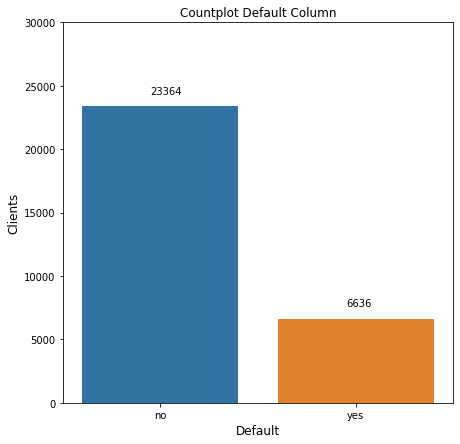

In [78]:
ax = sns.countplot(x="default", data=df)
plt.xticks([0,1],['no', 'yes'])
plt.xlabel("Default", fontsize= 12)
plt.ylabel("Clients", fontsize= 12)
plt.ylim(0,30000)
# ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+1000))
plt.title('Countplot Default Column')
plt.show()

### GENDER

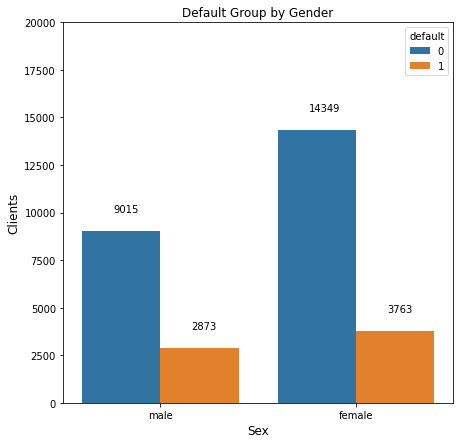

In [81]:
ax = sns.countplot(x="SEX", hue='default', data=df)

plt.xticks([0,1],['male', 'female'])
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Clients", fontsize= 12)
plt.ylim(0,20000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
plt.title('Default Group by Gender')
plt.show()

### AGE

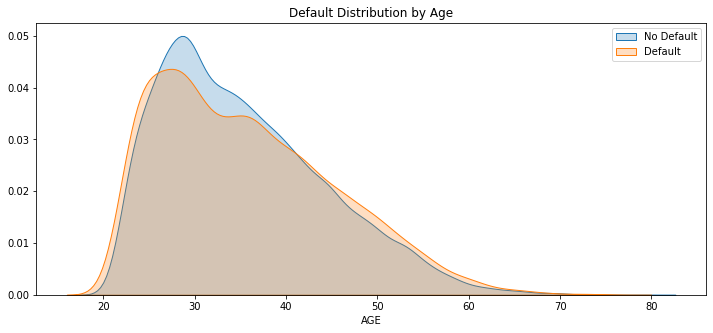

In [83]:
plt.figure(figsize=(12,5))

sns.kdeplot(df.loc[(df['default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()

plt.title('Default Distribution by Age')
plt.show()

The Highest default shows in the age group between 20 - 40, but it also means that our data have highest distribution there. We will look closer using age bin and ratio between the default. 

In [44]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
df['AgeBin'] = df['AgeBin'].astype(str)
df_grup = df['default'].groupby(df['AgeBin']).value_counts()
df_grup

AgeBin    default
(20, 25]  0          2839
          1          1032
(25, 30]  0          5703
          1          1439
(30, 35]  0          4670
          1          1126
(35, 40]  0          3854
          1          1063
(40, 50]  0          4606
          1          1399
(50, 60]  0          1493
          1           504
(60, 80]  0           199
          1            73
Name: default, dtype: int64

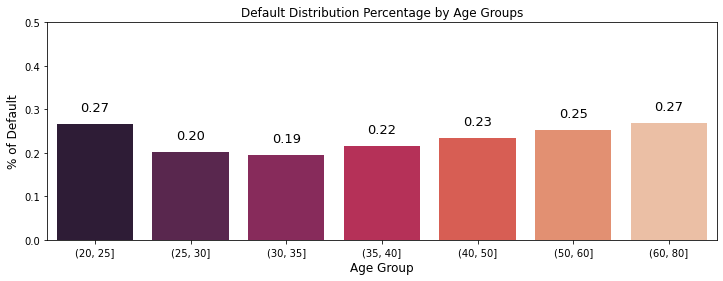

In [86]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.barplot(x = "AgeBin", y = "default", data = df, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.title('Default Distribution Percentage by Age Groups')
plt.show()

from the result above we could say that the lowest default are in age group 25-35, and the highest between 20-25 and 60-80

### EDUCATION

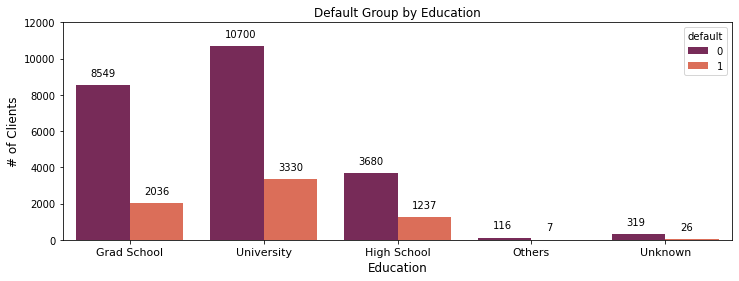

In [85]:
df['default'].groupby(df['EDUCATION']).value_counts(normalize=True)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="default", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.title('Default Group by Education')
plt.show()

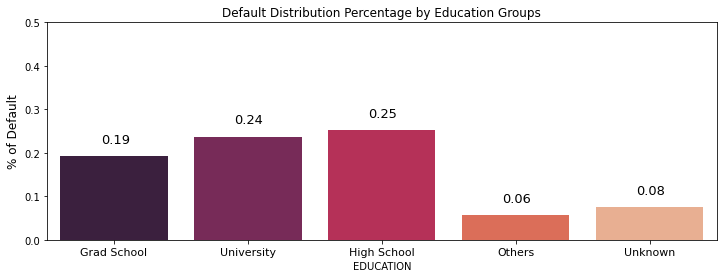

In [87]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.title('Default Distribution Percentage by Education Groups')
plt.show()

We summarize the 0 category into unknown. The result shows costumer with higher education has higher probability ti default.

### MARTIAL STATUS

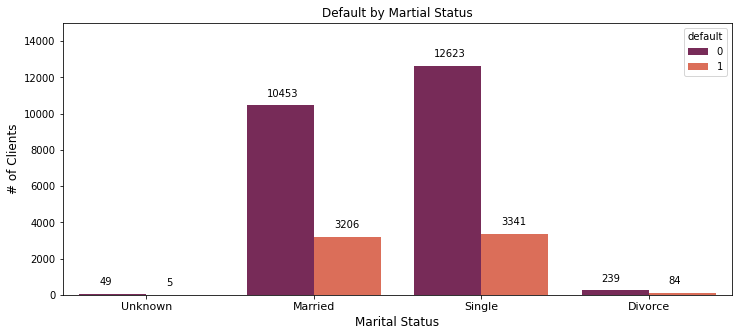

In [88]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="default", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.title('Default by Martial Status')
plt.show()

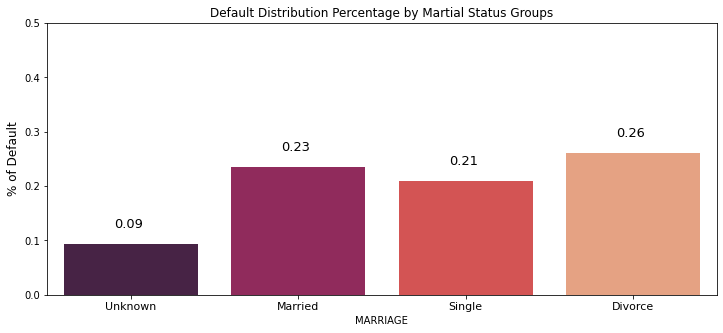

In [89]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.title('Default Distribution Percentage by Martial Status Groups')
plt.show()

Single person has the lowest default probability.

### CORRELATION HEATMAP

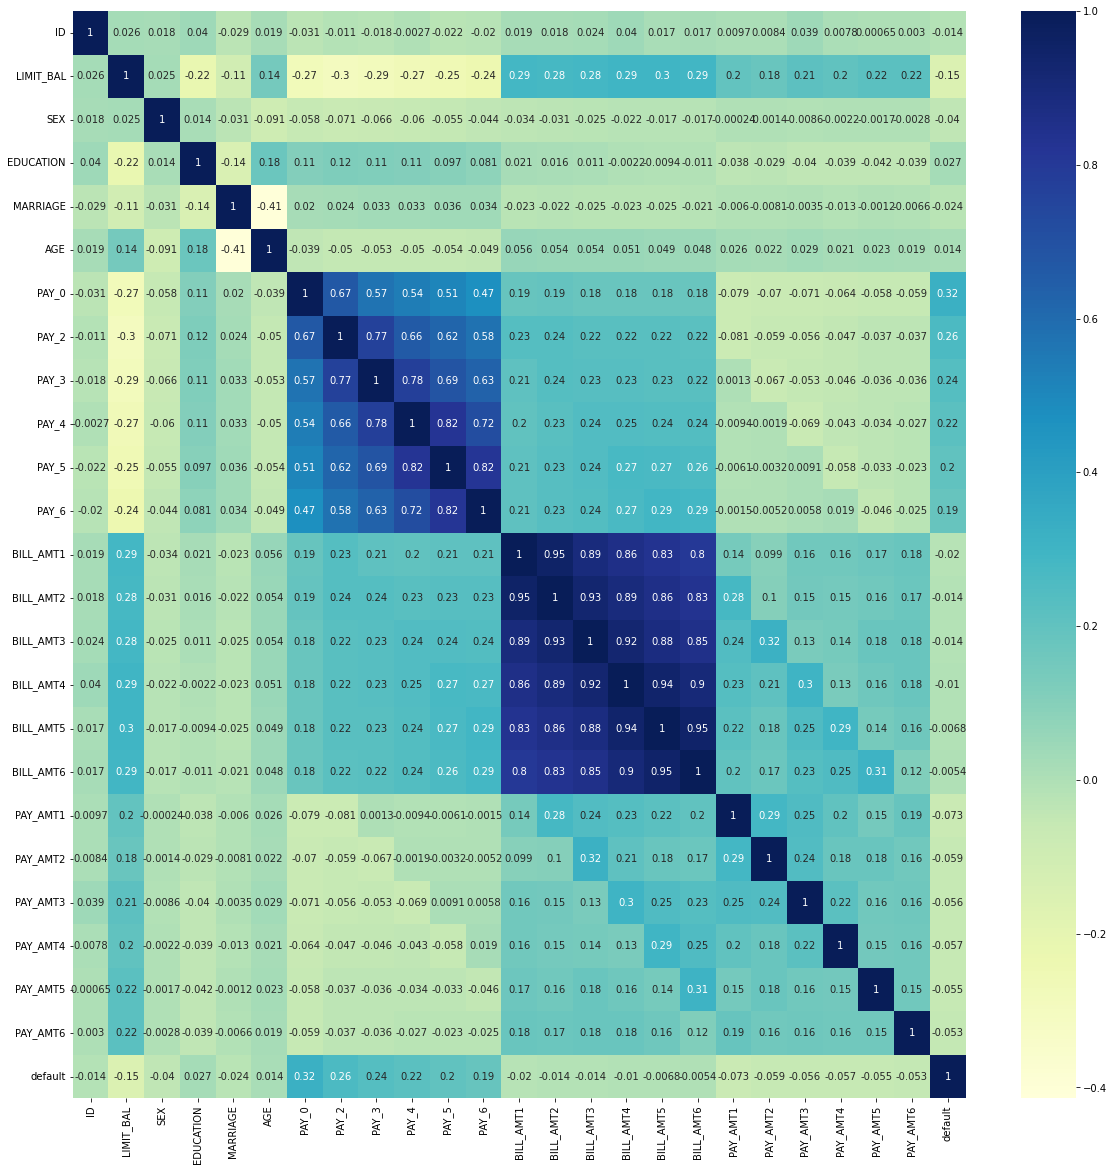

In [98]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

From the correlation heat map we can conclude that payment data and bill amount is strongly correlated with each other. But we need the correlation between default column with others. 

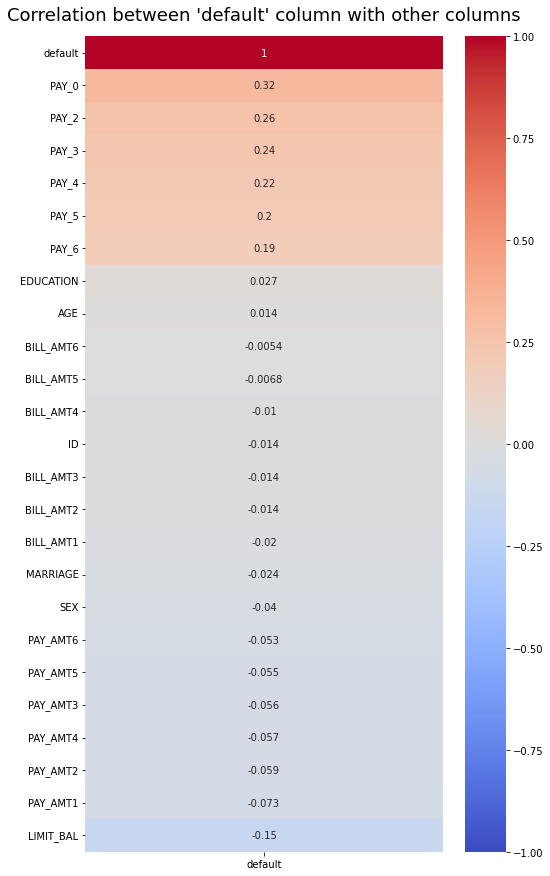

In [101]:
plt.figure(figsize=(8, 15))
heatmap = sns.heatmap(corr[['default']].sort_values(by='default', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title("Correlation between 'default' column with other columns", fontdict={'fontsize':18}, pad=16)
plt.show()

We can see that the payment columns have a significant positive correlation and the limit balance column has a significant negative correlation with default column.